# House Price Prediction using Linear Regression


This project demonstrates the use of Linear Regression to predict house prices based on key features of homes. The dataset includes variables like LotArea, BedroomAbvGr, FullBath, and other structural attributes. The goal of this analysis is to build a predictive model and evaluate its performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² score.

In [16]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Loading Training Data

In [17]:
#train datasets
train_data = pd.read_csv(r"D:\2024\ALL FILES\AMRITA NOTES\certificate\internship\prodigy infotech\datasets\train.csv") #file path
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Selecting Features and Target Variable

In this step, the key features that are most likely to influence house prices are selected. The features include structural and size-related attributes such as:

LotArea: Lot size in square feet
1stFlrSF: First-floor square footage
2ndFlrSF: Second-floor square footage
FullBath: Number of full bathrooms above grade
HalfBath: Number of half bathrooms above grade
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
TotRmsAbvGrd: Total rooms above grade
BedroomAbvGr: Number of bedrooms above grade

These features are stored in the X variable, while the target variable, SalePrice, is stored in the y variable.

In [52]:
#features given LotArea: Lot size in square feet , 1stFlrSF: First Floor square feet , 2ndFlrSF: Second floor square feet
# FullBath: Full bathrooms above grade , HalfBath: Half baths above grade ,BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms , TotRmsAbvGrd: Total rooms above grade  ,BedroomAbvGr : Bedrooms above grade
features = ['LotArea', 'BedroomAbvGr', 'FullBath','HalfBath','1stFlrSF','2ndFlrSF','BsmtFullBath','BsmtHalfBath','TotRmsAbvGrd']
X = train_data[features]
y = train_data['SalePrice']
X.head()


,LotArea,BedroomAbvGr,FullBath,HalfBath,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,TotRmsAbvGrd
0,8450,3,2,1,856,854,1,0,8
1,9600,3,2,0,1262,0,0,1,6
2,11250,3,2,1,920,866,1,0,6
3,9550,3,1,0,961,756,1,0,7
4,14260,4,2,1,1145,1053,1,0,9


# Handling Missing Values

SimpleImputer(strategy='median'): Creates an imputer object that will replace missing values with the median value of each column.

imputer.fit_transform(X): Fits the imputer on the feature set X and then transforms X by replacing missing values with the computed median.

In [46]:
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Splitting Data into Training and Testing Sets

In [47]:
# Split the data for testing and training
X_train, X_local_test, y_train, y_local_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


# Defining and Training the Linear Regression Model

A Linear Regression model is created and trained using the training data. The LinearRegression class from sklearn is used to build the model, which aims to find the best-fitting line to predict house prices based on the input features.

In [48]:
#defining model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
local_test_predictions = model.predict(X_local_test)
print(local_test_predictions)

[113947.06833043 308076.73796899 120695.00415604 174865.69218567
 245124.75903031 111032.9588234  199892.86569033 178256.48940121
 111172.72555024 149592.55895744 160775.68670279 104845.39559379
 113726.60615122 196389.35250418 197570.7222947  144549.01218235
 193785.690533   135556.40641585 123100.03269348 212307.84086688
 251524.43112737 179874.09441374 197070.28487358 127384.89506993
 202423.69995958 173226.18162502 171136.42290602 102304.2610173
 192629.78361623 188195.01281795 106210.99468229 246732.46610713
 318924.3123302  108226.25861982 234048.58342658 132241.20231766
 205337.72842259 188225.23011674 256883.05623125 102179.1789488
  80245.06831417 260639.8455627   91157.71475872 278073.16683481
 116882.95713069 176219.9832344  108109.72616106 117023.97721616
 306536.43815271 150929.68703199  98667.2950305  234264.4012669
 110169.12565384 397820.80943    139235.09452446 239480.64412506
 227212.63107724 157169.2545222  134115.33955157  98966.27584952
  83608.58959783 170770.3839

# Evaluating Model Performance

mean_absolute_error(y_local_test, local_test_predictions): Calculates the MAE, which measures the average magnitude of errors in predictions, without considering their direction.

mean_squared_error(y_local_test, local_test_predictions): Computes the MSE, which measures the average of the squares of errors, giving more weight to larger errors.

np.sqrt(mse): Computes the RMSE by taking the square root of MSE, providing an error metric in the same units as the target variable.

r2_score(y_local_test, local_test_predictions): Calculates the R² score, which indicates how well the model’s predictions match the actual values

In [50]:
mae = mean_absolute_error(y_local_test, local_test_predictions)
mse = mean_squared_error(y_local_test, local_test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_local_test, local_test_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²) Score: {r2:.2f}")

Mean Absolute Error (MAE): 31549.98
Mean Squared Error (MSE): 2278585381.43
Root Mean Squared Error (RMSE): 47734.53
R-squared (R²) Score: 0.70


# Visualizing Model Predictions

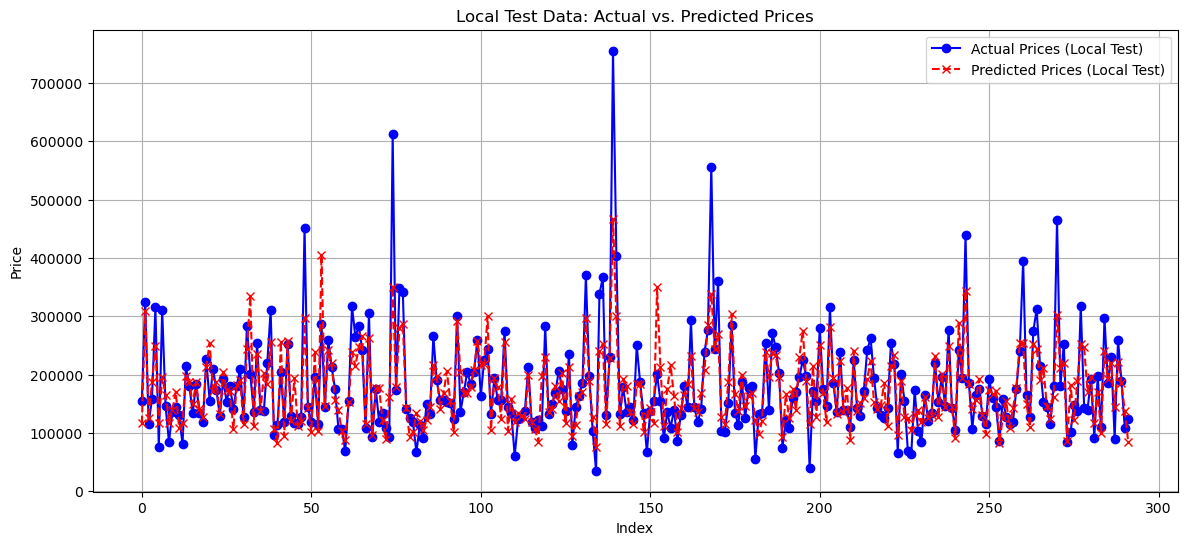

In [38]:
plt.figure(figsize=(14, 6))

plt.plot(y_local_test.values, label='Actual Prices (Local Test)', color='blue', linestyle='-', marker='o')
plt.plot(local_test_predictions, label='Predicted Prices (Local Test)', color='red', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Local Test Data: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
# Load the test dataset
test_data = pd.read_csv(r'D:\2024\ALL FILES\AMRITA NOTES\certificate\internship\prodigy infotech\datasets\test.csv')

# Impute missing values in the test data using the same strategy
test_data_imputed = imputer.transform(test_data[features])

# Predict on the test data
test_predictions = model.predict(test_data_imputed)
print(test_predictions)

[111540.88731671 140872.13660383 180413.49566224 ... 134978.06015646
 106386.85129044 221534.7229779 ]


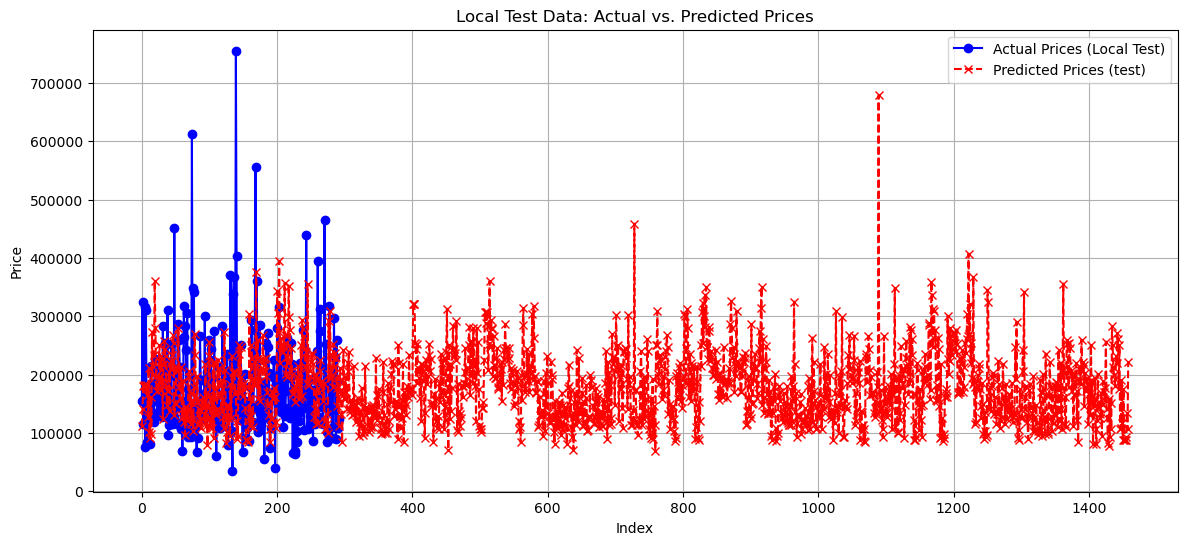

In [40]:
plt.figure(figsize=(14, 6))

plt.plot(y_local_test.values, label='Actual Prices (Local Test)', color='blue', linestyle='-', marker='o')
plt.plot(test_predictions, label='Predicted Prices (test)', color='red', linestyle='--', marker='x')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Local Test Data: Actual vs. Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()

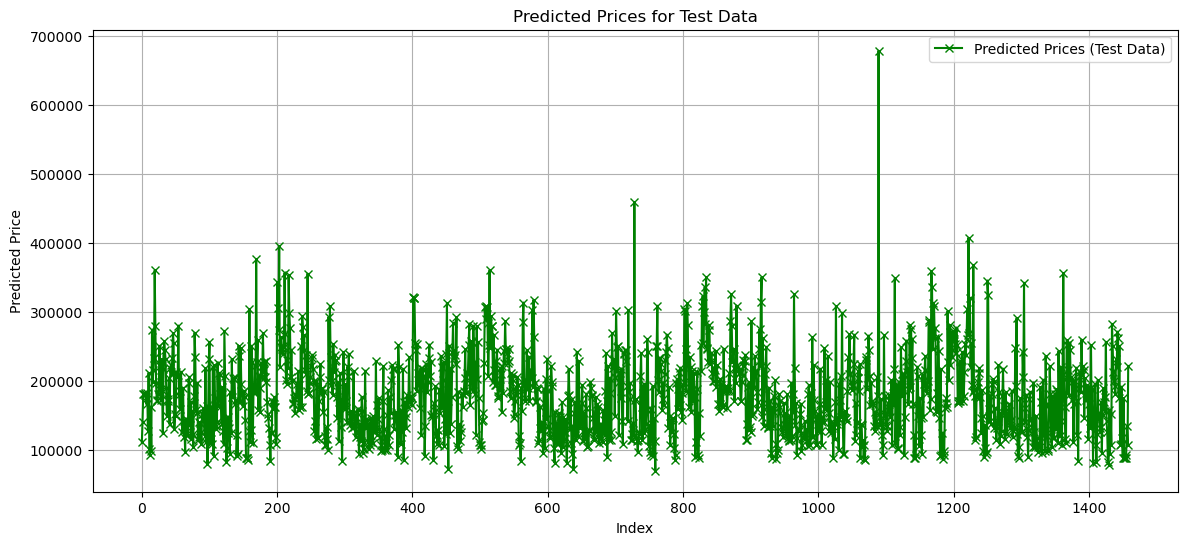

In [41]:
plt.figure(figsize=(14, 6))

# Plot predicted prices as a line graph
plt.plot(range(len(test_predictions)), test_predictions, label='Predicted Prices (Test Data)', color='green', linestyle='-', marker='x')

# Add labels, title, and legend
plt.xlabel('Index')
plt.ylabel('Predicted Price')
plt.title('Predicted Prices for Test Data')
plt.legend()
plt.grid(True)

plt.show()